## 1. Data Preprocessing 

In this step, I prepare my data for analysis. I import the necessary libraries, load and inspect the dataset, and conduct exploratory data analysis to make the data ready for prediction.

In [11]:
# load the key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [12]:
# load the dataset
data = pd.read_excel(r"C:\Users\PATH TECH\OneDrive\Desktop\COURSES\Data science\Employees_attendance_prediction\data_sets\Absenteesim_at_work\Absenteeism_at_work.xls")

# trim spaces in the column names
data.columns = data.columns.str.replace(" ", "_")
data.head()


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [13]:
# inspect the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason_for_absence               740 non-null    int64
 2   Month_of_absence                 740 non-null    int64
 3   Day_of_the_week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation_expense           740 non-null    int64
 6   Distance_from_Residence_to_Work  740 non-null    int64
 7   Service_time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work_load_Average/day_           740 non-null    int64
 10  Hit_target                       740 non-null    int64
 11  Disciplinary_failure             740 non-null    int64
 12  Education                        740 non-null    i

## 2. Model development
In this step, I select various classification algorithms, including logistic regression and random forests, train them, and evaluate their performance to choose the most efficient model for predicting employee attendance.

In [14]:
# Define the target variable: If absenteeism time > 0, mark as 'Absent' (1), else 'Present' (0)
data['Absent'] = (data['Absenteeism_time_in_hours'] > 0).astype(int)

# Drop the the unnecessary columns including "ID"and "Absenteeism_time_in_hours" column
data.drop(columns=["ID","Absenteeism_time_in_hours"], inplace=True)

# Display updated dataset first few rows
print(data.head())


   Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0                  26                 7                3        1   
1                   0                 7                3        1   
2                  23                 7                4        1   
3                   7                 7                5        1   
4                  23                 7                5        1   

   Transportation_expense  Distance_from_Residence_to_Work  Service_time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work_load_Average/day_  Hit_target  Disciplinary_failure  Education  Son  \
0                  

In [15]:
# Define categorical columns that need encoding
categorical_features = ["Reason_for_absence", "Month_of_absence", "Day_of_the_week", "Seasons", "Education"]

# Convert categorical features to categorical type
data[categorical_features] = data[categorical_features].astype("category")


In [16]:


    # Apply one-hot encoding to categorical features
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    # Split dataset into features (X) and target (Y)
    x = data.drop(columns=["Absent"])  
    y = data["Absent"]

    # Split data into training (80%) and testing sets (20%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training set: {x_train.shape}, Testing set: {x_test.shape}")

Training set: (592, 63), Testing set: (148, 63)


In [17]:

# Standardize numerical features for model performance improvement
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


Model 1: Logistics Regression

In [18]:
# Import the basic libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.99      1.00      0.99       139

    accuracy                           0.99       148
   macro avg       0.99      0.89      0.93       148
weighted avg       0.99      0.99      0.99       148



Model 2: Random Forest

In [19]:
#import basic libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.99      1.00      0.99       139

    accuracy                           0.99       148
   macro avg       0.99      0.89      0.93       148
weighted avg       0.99      0.99      0.99       148



Use the confusion matrix to visualize the distribution of correct and incorrect predictions.

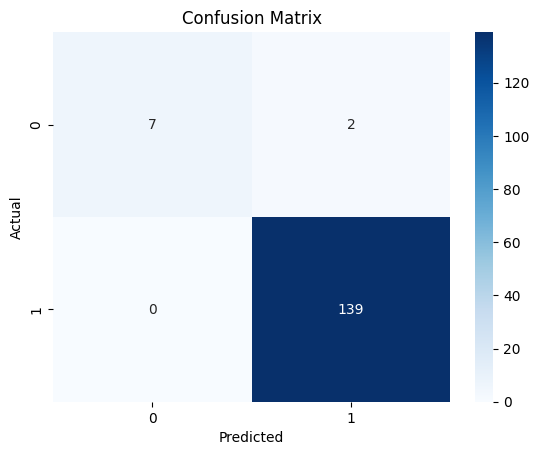

In [20]:
# import key modules
from sklearn.metrics import confusion_matrix

# plot the heatmpa graph
cm = confusion_matrix(y_test, y_pred)                                                              
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Use ROC_AUC Score for assessing the model discrimination

In [21]:
# Import the  roc_auc_score module
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.8888888888888888


Use the precision and recall to check whether there might be the false positives or false negatives that can lead to certain consequences. 

In [22]:
# Import the key modules
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9858156028368794
Recall: 1.0


## 3. Model optimization
In this step, I tune the hyperparameters to optimize the performance of the chosen model. 

In [23]:
# optimize the parameters using the GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


## 4. Feature Importance
I identify the features in the dataset that have the most impact on the chosen model's predictions to enhance its performance and provide insights into the relationships between features affecting the predictions.  

In [24]:
# Extract feature importance
feature_importances = rf_model.feature_importances_
feature_names = x.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]


In [25]:
# Prepare data for visualization
important_features_df = pd.DataFrame({
    'Feature': feature_names[sorted_indices],
    'Importance': feature_importances[sorted_indices]
})


In [26]:

# Save feature names after preprocessing
joblib.dump(x_train.columns.tolist(), "feature_names.joblib")

['feature_names.joblib']

In [27]:
# Load the feature names used in training
feature_names = joblib.load("feature_names.joblib")

# Print all expected features
print("Model expects these features:", feature_names)
print("Total number of features:", len(feature_names))

Model expects these features: ['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Disciplinary_failure', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Reason_for_absence_1', 'Reason_for_absence_2', 'Reason_for_absence_3', 'Reason_for_absence_4', 'Reason_for_absence_5', 'Reason_for_absence_6', 'Reason_for_absence_7', 'Reason_for_absence_8', 'Reason_for_absence_9', 'Reason_for_absence_10', 'Reason_for_absence_11', 'Reason_for_absence_12', 'Reason_for_absence_13', 'Reason_for_absence_14', 'Reason_for_absence_15', 'Reason_for_absence_16', 'Reason_for_absence_17', 'Reason_for_absence_18', 'Reason_for_absence_19', 'Reason_for_absence_21', 'Reason_for_absence_22', 'Reason_for_absence_23', 'Reason_for_absence_24', 'Reason_for_absence_25', 'Reason_for_absence_26', 'Reason_for_absence_27', 'Reason_for_absence_28', 'Month_of_absence_1', 'Month_of_absence_2', 'Month_of_absence_3', '

In [28]:
# Display classification report and feature importance visualization
import matplotlib.pyplot as plt
import ace_tools_open as tools

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.99


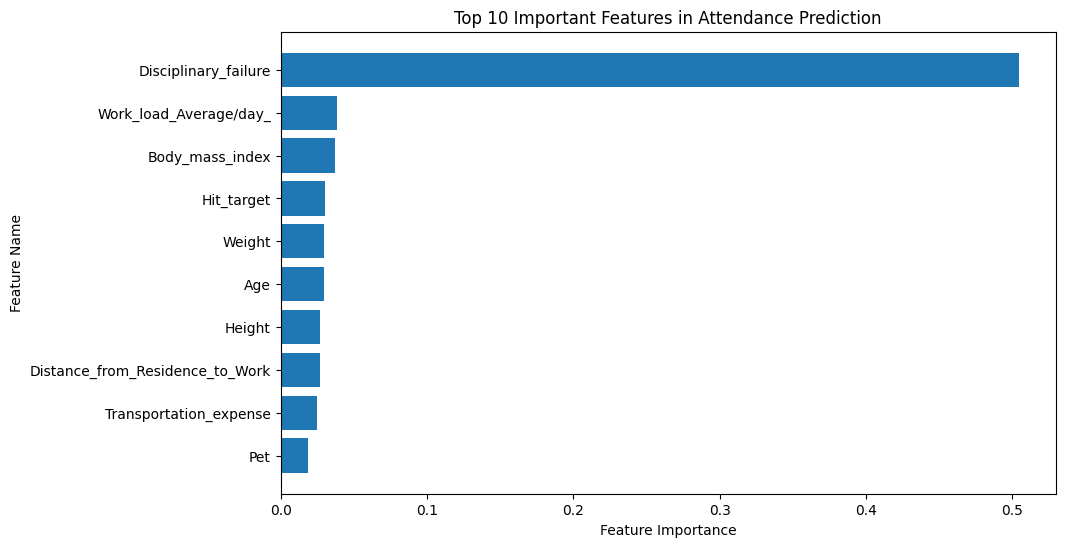

Feature Importance


In [29]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features_df['Feature'][:10], important_features_df['Importance'][:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Attendance Prediction")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Display feature importance table
tools.display_dataframe_to_user(name="Feature Importance", dataframe=important_features_df)


Save the chosen model for deployment

In [30]:
# Save the trained model and scaler
model_save_path = "C:/Users/PATH TECH/OneDrive/Desktop/COURSES/Data science/Hands_on_ml/rf_model.joblib"
scaler_save_path = "C:/Users/PATH TECH/OneDrive/Desktop/COURSES/Data science/Hands_on_ml/scaler.joblib"

joblib.dump(rf_model, model_save_path)
joblib.dump(scaler, scaler_save_path)

['C:/Users/PATH TECH/OneDrive/Desktop/COURSES/Data science/Hands_on_ml/scaler.joblib']

In [31]:
# Return saved model paths and accuracy
model_save_path, scaler_save_path, accuracy_rf

('C:/Users/PATH TECH/OneDrive/Desktop/COURSES/Data science/Hands_on_ml/rf_model.joblib',
 'C:/Users/PATH TECH/OneDrive/Desktop/COURSES/Data science/Hands_on_ml/scaler.joblib',
 0.9864864864864865)